# Merging prices data with species data with climate data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_prices_producer = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Worked_datasets\preco_no_produtor.csv")

df_prices_producer.head()

,categoria,produtos_agricolas,unidade,Ano,Preco
0,Plantas Industriais,Cana-de-açúcar,Euro/100 kg,2010,25.00
1,Vegetais e Produtos Hortícolas,Alface,Euro/100 kg,2010,206.53
2,Vegetais e Produtos Hortícolas,Couve repolho,Euro/100 kg,2010,65.01
3,Vegetais e Produtos Hortícolas,Tomate,Euro/100 kg,2010,114.38
4,Vegetais e Produtos Hortícolas,Cenoura,Euro/100 kg,2010,117.68


In [4]:
df_prodction_by_product = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Worked_datasets\prod_madeira_2019_2024.csv")

df_prodction_by_product.head()

,Cultura,Ano,Superfície,Produção
0,Abacate,2019,50.394000,415.368722
1,Abacate,2020,50.394000,461.783317
2,Abacate,2021,50.394000,490.101632
3,Abacate,2022,51.000000,498.000000
4,Abacate,2023,51.153123,475.000000


In [5]:
df_prodction_by_product.nunique()

Cultura        35
Ano             6
Superfície    116
Produção      189
dtype: int64

In [6]:
df_products_scores = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Worked_datasets\species_scored.csv")   
df_products_scores.head() 

,cultura,nome_científico,família,germinacao_Tmin,germinacao_Totima,germincacao_Tmáxima,vegetacao_Tmin,vegetacao_Toptima,vegetacao_Tmax,tolerancia_salinidade,...,notas_principais,solo_pref_cat,sol_fotoperiodo_cat,necessidade_hidrica_num,tolerancia_acidez_num,tolerancia_salinidade_num,ph_min,ph_max,sol_min,score_agro
0,Abóbora,Curcubita sp.,Curcubitaceae,7.5,32.5,38.0,10,22.5,32.0,Moderada a Elevada,...,Não tolera geadas; gosta de calor,1.0,3.0,NaN,NaN,NaN,6.0,6.8,6.0,1.00
1,Banana,"Musa acuminata × Musa balbisiana (AA–AAA, etc.)",Musaceae,NaN,NaN,NaN,15,28.0,35.0,Moderada a elevada (algumas variedades toleram...,...,Sensível ao vento forte,2.0,3.0,NaN,NaN,3.0,5.5,7.5,8.0,0.75
2,Batata,Solanum tuberosum,Solanaceae,3.5,19.0,NaN,7,20.0,32.5,Moderada,...,Não gosta de solos encharcados,1.0,NaN,NaN,NaN,NaN,5.5,6.0,6.0,1.00
3,Batata-doce,Ipomoea batatas,Convolvulaceae,15.0,27.5,38.0,15,23.5,35.0,Moderada,...,"Tolerante à seca, mas prefere calor",1.0,3.0,2.0,NaN,NaN,5.5,6.5,6.0,0.75
4,Cana-de-açúcar,Saccharum officinarum,Poaceae,18.0,30.0,38.0,18,27.5,36.5,"Elevada (resiste a EC 1,7–2,5 dS/m)",...,Cultura de clima tropical/subtropical,2.0,3.0,NaN,NaN,NaN,6.0,7.5,8.0,0.75


In [7]:
df_products_scores.columns.tolist()


['cultura',
 'nome_científico',
 'família',
 'germinacao_Tmin',
 'germinacao_Totima',
 'germincacao_Tmáxima',
 'vegetacao_Tmin',
 'vegetacao_Toptima',
 'vegetacao_Tmax',
 'tolerancia_salinidade',
 'intervalo_otimp_pH',
 'tolerancia_acidez',
 'solo_preferido',
 'sol_fotoperíodo',
 'clima_ideal _°C',
 'necessidade_hidrica',
 'notas_principais',
 'solo_pref_cat',
 'sol_fotoperiodo_cat',
 'necessidade_hidrica_num',
 'tolerancia_acidez_num',
 'tolerancia_salinidade_num',
 'ph_min',
 'ph_max',
 'sol_min',
 'score_agro']

In [8]:
import re

def extract_sol_min(text):
    if pd.isna(text):
        return None
    # procurar número antes de "h" (ex: "≥ 6h", "8h", "6–8h")
    match = re.findall(r"(\d+)", str(text))
    if match:
        return float(match[0])  # pega no primeiro número
    return None

df_products_scores["sol_min"] = df_products_scores["sol_fotoperíodo"].apply(extract_sol_min)

In [9]:
print("Preços:", df_prices_producer["produtos_agricolas"].unique()[:30])
print("Produção:", df_prodction_by_product["Cultura"].unique()[:30])

Preços: ['Cana-de-açúcar' 'Alface' 'Couve repolho' 'Tomate ' 'Cenoura'
 'Feijão verde' 'Cebola' 'Pepino' 'Pimento' 'Courgette' 'Nabo' 'Abóbora'
 'Acelga' 'Pimpinela' 'Rosa' 'Cravo' 'Gerbera' 'Estrelícia' 'Antúrio'
 'Orquídea' 'Protea' 'Batata primor' 'Batata de conservação' 'Maçãs'
 'Cerejas' 'Tangerinas' 'Limões' 'Banana' 'Abacate' 'Anona']
Produção: ['Abacate' 'Abóbora' 'Alface' 'Ameixa' 'Anona' 'Banana' 'Batata'
 'Batata-doce' 'Cana-de-açúcar' 'Castanha' 'Cebola' 'Cenoura' 'Cereja'
 'Couve-bróculo' 'Couve-flor' 'Couve-repolho' 'Fava em verde'
 'Feijão maduro' 'Feijão-verde' 'Inhame' 'Kiwi' 'Limão'
 'Macieiras regionais' 'Manga' 'Maracujá' 'Maçã' 'Milho p/maçaroca'
 'Morango' 'Nabo' 'Papaia']


In [10]:
import pandas as pd

# === 1. Normalizar nomes ===
def normalize_name(name):
    import re, unidecode
    if pd.isna(name):
        return None
    name = str(name).lower().strip()
    name = unidecode.unidecode(name)
    name = re.sub(r"[^a-z0-9]+", "-", name)  # substitui espaços e símbolos por "-"
    return name.strip("-")

df_prices_producer["cultura_norm"] = df_prices_producer["produtos_agricolas"].apply(normalize_name)
df_prodction_by_product["cultura_norm"]   = df_prodction_by_product["Cultura"].apply(normalize_name)
df_products_scores["cultura_norm"] = df_products_scores["cultura"].apply(normalize_name)

# === 2. Mapa de equivalências ===
mapa = {
    "batata-primor": "batata",
    "batata-conservacao": "batata",
    "macas": "maca",
    "macieiras-regionais": "maca",
    "uvas": "uva-vitis",
    "vinha-vitis-vinifera-a": "uva-vitis",
    "vinha-vitis-vinifera": "uva-vitis",
    "limoes": "limao",
    "tangerinas": "tangerina",
    "pimpinela": "pimpinela-chuchu",
    "milho-p-macaroca": "milho-p-macaroca",
}

for df in [df_prices_producer, df_prodction_by_product, df_products_scores]:
    df["cultura_norm"] = df["cultura_norm"].replace(mapa)


df_prices_producer["Ano"] = df_prices_producer["Ano"].astype(int)
df_prodction_by_product["Ano"]   = df_prodction_by_product["Ano"].astype(int)

# 2. Filtrar intervalo 2019–2024
df_prices_filtrado = df_prices_producer[df_prices_producer["Ano"].between(2019, 2024)]
df_prod_filtrado   = df_prodction_by_product[df_prodction_by_product["Ano"].between(2019, 2024)]

# === 3. Merge datasets ===
df_merged = (
    df_prices_filtrado
    .merge(df_prod_filtrado, on=["cultura_norm", "Ano"], how="inner")  # mantém só anos comuns
    .merge(df_products_scores, on="cultura_norm", how="left")
)

# === 4. Guardar dataset final ===
#df_merged.to_excel("dataset_final.xlsx", index=False)

print(df_merged.head(20))


                         categoria produtos_agricolas      unidade   Ano  \
0              Plantas Industriais     Cana-de-açúcar  Euro/100 kg  2019   
1   Vegetais e Produtos Hortícolas             Alface  Euro/100 kg  2019   
2   Vegetais e Produtos Hortícolas      Couve repolho  Euro/100 kg  2019   
3   Vegetais e Produtos Hortícolas            Tomate   Euro/100 kg  2019   
4   Vegetais e Produtos Hortícolas            Cenoura  Euro/100 kg  2019   
5   Vegetais e Produtos Hortícolas       Feijão verde  Euro/100 kg  2019   
6   Vegetais e Produtos Hortícolas             Cebola  Euro/100 kg  2019   
7   Vegetais e Produtos Hortícolas               Nabo  Euro/100 kg  2019   
8   Vegetais e Produtos Hortícolas            Abóbora  Euro/100 kg  2019   
9                Batata de consumo      Batata primor  Euro/100 kg  2019   
10                         Frutos               Maçãs  Euro/100 kg  2019   
11                         Frutos          Tangerinas  Euro/100 kg  2019   
12          

In [11]:
df_merged.head()

,categoria,produtos_agricolas,unidade,Ano,Preco,cultura_norm,Cultura,Superfície,Produção,cultura,...,notas_principais,solo_pref_cat,sol_fotoperiodo_cat,necessidade_hidrica_num,tolerancia_acidez_num,tolerancia_salinidade_num,ph_min,ph_max,sol_min,score_agro
0,Plantas Industriais,Cana-de-açúcar,Euro/100 kg,2019,28.00,cana-de-acucar,Cana-de-açúcar,173.54,9814.286187,Cana-de-açúcar,...,Cultura de clima tropical/subtropical,2.0,3.0,NaN,NaN,NaN,6.0,7.5,8.0,0.750000
1,Vegetais e Produtos Hortícolas,Alface,Euro/100 kg,2019,95.87,alface,Alface,49.05,1494.835047,Alface,...,NaN,NaN,NaN,3.0,NaN,NaN,6.0,7.0,10.0,1.000000
2,Vegetais e Produtos Hortícolas,Couve repolho,Euro/100 kg,2019,53.95,couve-repolho,Couve-repolho,104.00,3587.063742,Couve-repolho,...,Prefere clima fresco,2.0,1.0,NaN,NaN,NaN,6.5,7.5,NaN,0.666667
3,Vegetais e Produtos Hortícolas,Tomate,Euro/100 kg,2019,93.15,tomate,Tomate,32.00,1298.227412,Tomate,...,NaN,2.0,NaN,NaN,NaN,NaN,6.0,6.8,6.0,1.000000
4,Vegetais e Produtos Hortícolas,Cenoura,Euro/100 kg,2019,81.82,cenoura,Cenoura,29.20,1001.578582,Cenoura,...,NaN,1.0,NaN,NaN,NaN,NaN,6.0,6.8,10.0,1.000000


In [12]:
# drop unused columns "notas_principais"

df_merged = df_merged.drop(columns=["notas_principais"])
df_merged.head()


,categoria,produtos_agricolas,unidade,Ano,Preco,cultura_norm,Cultura,Superfície,Produção,cultura,...,necessidade_hidrica,solo_pref_cat,sol_fotoperiodo_cat,necessidade_hidrica_num,tolerancia_acidez_num,tolerancia_salinidade_num,ph_min,ph_max,sol_min,score_agro
0,Plantas Industriais,Cana-de-açúcar,Euro/100 kg,2019,28.00,cana-de-acucar,Cana-de-açúcar,173.54,9814.286187,Cana-de-açúcar,...,Muito alta,2.0,3.0,NaN,NaN,NaN,6.0,7.5,8.0,0.750000
1,Vegetais e Produtos Hortícolas,Alface,Euro/100 kg,2019,95.87,alface,Alface,49.05,1494.835047,Alface,...,"Moderada a elevada (rega frequente, não enchar...",NaN,NaN,3.0,NaN,NaN,6.0,7.0,10.0,1.000000
2,Vegetais e Produtos Hortícolas,Couve repolho,Euro/100 kg,2019,53.95,couve-repolho,Couve-repolho,104.00,3587.063742,Couve-repolho,...,Moderada (rega frequente),2.0,1.0,NaN,NaN,NaN,6.5,7.5,NaN,0.666667
3,Vegetais e Produtos Hortícolas,Tomate,Euro/100 kg,2019,93.15,tomate,Tomate,32.00,1298.227412,Tomate,...,"Elevada, cerca de 600–800 mm por ciclo, com ma...",2.0,NaN,NaN,NaN,NaN,6.0,6.8,6.0,1.000000
4,Vegetais e Produtos Hortícolas,Cenoura,Euro/100 kg,2019,81.82,cenoura,Cenoura,29.20,1001.578582,Cenoura,...,Moderada (necessita humidade constante),1.0,NaN,NaN,NaN,NaN,6.0,6.8,10.0,1.000000


In [13]:
df_merged.head()

,categoria,produtos_agricolas,unidade,Ano,Preco,cultura_norm,Cultura,Superfície,Produção,cultura,...,necessidade_hidrica,solo_pref_cat,sol_fotoperiodo_cat,necessidade_hidrica_num,tolerancia_acidez_num,tolerancia_salinidade_num,ph_min,ph_max,sol_min,score_agro
0,Plantas Industriais,Cana-de-açúcar,Euro/100 kg,2019,28.00,cana-de-acucar,Cana-de-açúcar,173.54,9814.286187,Cana-de-açúcar,...,Muito alta,2.0,3.0,NaN,NaN,NaN,6.0,7.5,8.0,0.750000
1,Vegetais e Produtos Hortícolas,Alface,Euro/100 kg,2019,95.87,alface,Alface,49.05,1494.835047,Alface,...,"Moderada a elevada (rega frequente, não enchar...",NaN,NaN,3.0,NaN,NaN,6.0,7.0,10.0,1.000000
2,Vegetais e Produtos Hortícolas,Couve repolho,Euro/100 kg,2019,53.95,couve-repolho,Couve-repolho,104.00,3587.063742,Couve-repolho,...,Moderada (rega frequente),2.0,1.0,NaN,NaN,NaN,6.5,7.5,NaN,0.666667
3,Vegetais e Produtos Hortícolas,Tomate,Euro/100 kg,2019,93.15,tomate,Tomate,32.00,1298.227412,Tomate,...,"Elevada, cerca de 600–800 mm por ciclo, com ma...",2.0,NaN,NaN,NaN,NaN,6.0,6.8,6.0,1.000000
4,Vegetais e Produtos Hortícolas,Cenoura,Euro/100 kg,2019,81.82,cenoura,Cenoura,29.20,1001.578582,Cenoura,...,Moderada (necessita humidade constante),1.0,NaN,NaN,NaN,NaN,6.0,6.8,10.0,1.000000


In [14]:
df_merged.isna().sum()

categoria                      0
produtos_agricolas             0
unidade                        0
Ano                            0
Preco                          1
cultura_norm                   0
Cultura                        0
Superfície                     0
Produção                       3
cultura                        0
nome_científico                0
família                        0
germinacao_Tmin               17
germinacao_Totima              6
germincacao_Tmáxima           12
vegetacao_Tmin                 0
vegetacao_Toptima              0
vegetacao_Tmax                 0
tolerancia_salinidade          0
intervalo_otimp_pH             0
tolerancia_acidez              0
solo_preferido                 0
sol_fotoperíodo                0
clima_ideal _°C                0
necessidade_hidrica            0
solo_pref_cat                 18
sol_fotoperiodo_cat           36
necessidade_hidrica_num       66
tolerancia_acidez_num        125
tolerancia_salinidade_num    119
ph_min    

In [15]:
df_merged.shape

(125, 34)

In [16]:
df_merged.value_counts("sol_min")


sol_min
6.0     59
8.0     36
10.0    18
12.0     6
Name: count, dtype: int64

In [17]:
df_merged.columns

Index(['categoria', 'produtos_agricolas', 'unidade', 'Ano', 'Preco',
       'cultura_norm', 'Cultura', 'Superfície', 'Produção', 'cultura',
       'nome_científico', 'família', 'germinacao_Tmin', 'germinacao_Totima',
       'germincacao_Tmáxima', 'vegetacao_Tmin', 'vegetacao_Toptima',
       'vegetacao_Tmax', 'tolerancia_salinidade', 'intervalo_otimp_pH',
       'tolerancia_acidez', 'solo_preferido', 'sol_fotoperíodo',
       'clima_ideal _°C', 'necessidade_hidrica', 'solo_pref_cat',
       'sol_fotoperiodo_cat', 'necessidade_hidrica_num',
       'tolerancia_acidez_num', 'tolerancia_salinidade_num', 'ph_min',
       'ph_max', 'sol_min', 'score_agro'],
      dtype='object')

### Preparing a clean dataset for tableau

In [18]:
# Selecionar colunas chave + variáveis técnicas
df_tableau = df_merged[[
    "cultura_norm",
    "Ano",
    "Preco",
    "Superfície",
    "Produção",  
    "score_agro",
    "unidade",
    "categoria",
    # variáveis técnicas
    "solo_pref_cat",
    "sol_fotoperiodo_cat",
    "necessidade_hidrica_num",
    "tolerancia_acidez_num",
    "tolerancia_salinidade_num",
    "ph_min",
    "ph_max",
    "sol_min"
]].copy()

# Renomear colunas
df_tableau = df_tableau.rename(columns={
    "cultura_norm": "Cultura",
    "Ano_y": "Ano",
    "Superfície": "Superficie",
    "Produção": "Producao"
})

# Filtrar só 2019–2024
df_tableau = df_tableau[df_tableau["Ano"].between(2019, 2024)]

print(df_tableau.head())
print(df_tableau.shape)


          Cultura   Ano  Preco  Superficie     Producao  score_agro  \
0  cana-de-acucar  2019  28.00      173.54  9814.286187    0.750000   
1          alface  2019  95.87       49.05  1494.835047    1.000000   
2   couve-repolho  2019  53.95      104.00  3587.063742    0.666667   
3          tomate  2019  93.15       32.00  1298.227412    1.000000   
4         cenoura  2019  81.82       29.20  1001.578582    1.000000   

       unidade                       categoria  solo_pref_cat  \
0  Euro/100 kg             Plantas Industriais            2.0   
1  Euro/100 kg  Vegetais e Produtos Hortícolas            NaN   
2  Euro/100 kg  Vegetais e Produtos Hortícolas            2.0   
3  Euro/100 kg  Vegetais e Produtos Hortícolas            2.0   
4  Euro/100 kg  Vegetais e Produtos Hortícolas            1.0   

   sol_fotoperiodo_cat  necessidade_hidrica_num  tolerancia_acidez_num  \
0                  3.0                      NaN                    NaN   
1                  NaN            

In [19]:
df_tableau.to_excel(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Worked_datasets\dataset_tableau.xlsx", index=False)

In [20]:
df_merged.value_counts("cultura", "score_agro")

cultura
Maçã                      0.088
Abacate                   0.048
Abóbora                   0.048
Uva (Vitis)               0.048
Tomate                    0.048
Tangerina                 0.048
Nabo                      0.048
Limão                     0.048
Inhame                    0.048
Feijão-verde              0.048
Couve-repolho             0.048
Cenoura                   0.048
Cebola                    0.048
Cana-de-açúcar            0.048
Batata-doce               0.048
Batata                    0.048
Banana                    0.048
Anona                     0.048
Alface                    0.048
Vinha (Vitis vinifera)    0.048
Name: proportion, dtype: float64

In [21]:
df_tableau.head()

,Cultura,Ano,Preco,Superficie,Producao,score_agro,unidade,categoria,solo_pref_cat,sol_fotoperiodo_cat,necessidade_hidrica_num,tolerancia_acidez_num,tolerancia_salinidade_num,ph_min,ph_max,sol_min
0,cana-de-acucar,2019,28.00,173.54,9814.286187,0.750000,Euro/100 kg,Plantas Industriais,2.0,3.0,NaN,NaN,NaN,6.0,7.5,8.0
1,alface,2019,95.87,49.05,1494.835047,1.000000,Euro/100 kg,Vegetais e Produtos Hortícolas,NaN,NaN,3.0,NaN,NaN,6.0,7.0,10.0
2,couve-repolho,2019,53.95,104.00,3587.063742,0.666667,Euro/100 kg,Vegetais e Produtos Hortícolas,2.0,1.0,NaN,NaN,NaN,6.5,7.5,NaN
3,tomate,2019,93.15,32.00,1298.227412,1.000000,Euro/100 kg,Vegetais e Produtos Hortícolas,2.0,NaN,NaN,NaN,NaN,6.0,6.8,6.0
4,cenoura,2019,81.82,29.20,1001.578582,1.000000,Euro/100 kg,Vegetais e Produtos Hortícolas,1.0,NaN,NaN,NaN,NaN,6.0,6.8,10.0


In [22]:
df_tableau.columns

Index(['Cultura', 'Ano', 'Preco', 'Superficie', 'Producao', 'score_agro',
       'unidade', 'categoria', 'solo_pref_cat', 'sol_fotoperiodo_cat',
       'necessidade_hidrica_num', 'tolerancia_acidez_num',
       'tolerancia_salinidade_num', 'ph_min', 'ph_max', 'sol_min'],
      dtype='object')

# Statistics

In [23]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [24]:
from scipy.stats import pearsonr, spearmanr
import numpy as np

### Hypothesis 1:

“When production increases, the price tends to go down.”

- H₀: Production and price are not correlated.
- H₁: There is a correlation (expected negative).

In [25]:
df_test = df_tableau[["Cultura", "Ano", "Preco","Producao",]].dropna()

person_corr, p_val = pearsonr(df_test["Producao"], df_test["Preco"])
print(f"Pearson correlation: {person_corr:.3f}, p-value: {p_val}")

results = []
for culture, sub in df_test.groupby("Cultura"):
    if len(sub) > 2:  # só culturas com pelo menos 3 pontos de dados
        corr, p_val = spearmanr(sub["Producao"], sub["Preco"])
        results.append({"cultura": culture, "corr": corr, "p_val": p_val})

df_corrs = pd.DataFrame(results).sort_values("corr")
print(df_corrs)

Pearson correlation: -0.396, p-value: 6.894473917593232e-06
           cultura      corr     p_val
18       uva-vitis -0.900000  0.000387
15            nabo -0.882735  0.019820
9          cenoura -0.811679  0.049858
5           batata -0.800000  0.104088
8           cebola -0.637748  0.173071
7   cana-de-acucar -0.564288  0.321723
3            anona -0.371429  0.468478
13           limao -0.028571  0.957155
14            maca  0.000000  1.000000
11    feijao-verde  0.085714  0.871743
12          inhame  0.142857  0.787172
6      batata-doce  0.371429  0.468478
1          abobora  0.371429  0.468478
10   couve-repolho  0.428571  0.396501
4           banana  0.637536  0.173260
16       tangerina  0.637748  0.173071
0          abacate  0.657143  0.156175
2           alface  0.714286  0.110787
17          tomate  0.898645  0.014889


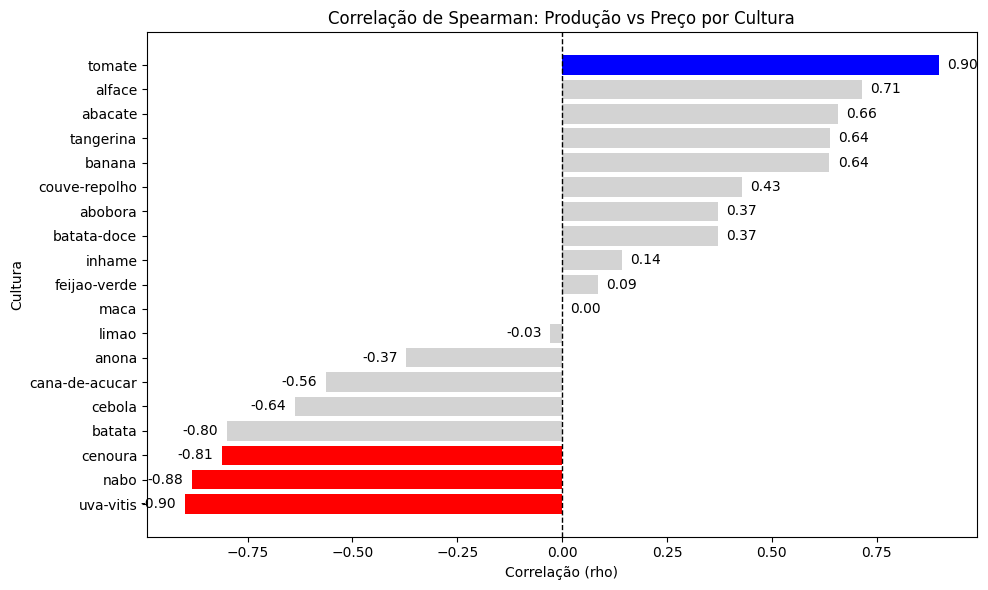

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copiar, limpar e ordenar
df_plot = df_corrs[['cultura','corr','p_val']].dropna().sort_values('corr')

# Cores: vermelha se corr<0 e p<0.05; azul se corr>=0 e p<0.05; cinzento se não significativo
colors = np.where(
    df_plot['p_val'] < 0.05,
    np.where(df_plot['corr'] < 0, 'red', 'blue'),
    'lightgray'
)

plt.figure(figsize=(10, 6))
plt.barh(df_plot['cultura'], df_plot['corr'], color=colors)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title('Correlação de Spearman: Produção vs Preço por Cultura')
plt.xlabel('Correlação (rho)')
plt.ylabel('Cultura')

# (opcional) rótulos nas barras
for y, v in enumerate(df_plot['corr']):
    plt.text(v + (0.02 if v>=0 else -0.02), y, f'{v:.2f}',
             va='center', ha='left' if v>=0 else 'right')

plt.tight_layout()
plt.show()

### Hypothesis 2:
"Crops with high water requirements have different average prices than those with low/moderate ones."

- H₀: There is no difference in the average prices between groups.
- H₁: There is a significant difference.

In [27]:
import scipy.stats as stats

df_test_2 = df_tableau[["Cultura", "Ano", "Preco","necessidade_hidrica_num",]].dropna()


groups = [g["Preco"].dropna().values for _, g in df_test_2.groupby("necessidade_hidrica_num")]

f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA: F = {f_stat:.3f}, p = {p_val:.5f}")

ANOVA: F = 16.238, p = 0.00017


### Hypothesis 3: 

"Agro-score influences the average yield."

- H₀: The agro-score has no effect.
- H₁: The agro-score has an effect.

In [28]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_test_3 = df_tableau[["Producao","score_agro",]].dropna()

X = sm.add_constant(df_test_3["score_agro"])
y = df_test_3["Producao"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Producao   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     65.43
Date:                Tue, 23 Sep 2025   Prob (F-statistic):           5.51e-13
Time:                        18:22:34   Log-Likelihood:                -1271.2
No. Observations:                 122   AIC:                             2546.
Df Residuals:                     120   BIC:                             2552.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.347e+04   5824.870      9.179      0.0

In [30]:
df_tableau.columns

Index(['Cultura', 'Ano', 'Preco', 'Superficie', 'Producao', 'score_agro',
       'unidade', 'categoria', 'solo_pref_cat', 'sol_fotoperiodo_cat',
       'necessidade_hidrica_num', 'tolerancia_acidez_num',
       'tolerancia_salinidade_num', 'ph_min', 'ph_max', 'sol_min'],
      dtype='object')

H1 — "Top of the ranking beats the rest"
- Hypothesis: Crops in the top 25% of the viability score have a higher average revenue (Price × Yield) than the rest.


H2 — "Less risk"
- Hypothesis: Crops at the top of the score have lower revenue volatility.

H3 — "Gain-decision curve"
- Hypothesis: There is a score threshold (e.g., 0.65–0.75) above which the probability of having a revenue above the median increases significantly.




In [31]:

g = df_tableau.groupby(["Cultura", "categoria"])
df_c = g.agg(
    Preco_medio=("Preco", "mean"),
    Prod_media=("Producao", "mean"),
    Receita_std=("Producao", "std"),
    score_agro=("score_agro", "mean")
).reset_index()

df_c["Receita_media"] = df_c["Preco_medio"] * df_c["Prod_media"]

# H1
import numpy as np, scipy.stats as st
q75 = df_c["score_agro"].quantile(0.75)
top = df_c["score_agro"] >= q75
t = st.mannwhitneyu(df_c.loc[top,"Receita_media"], df_c.loc[~top,"Receita_media"], alternative="greater")

# H2
t2 = st.mannwhitneyu(df_c.loc[top,"Receita_std"].dropna(), df_c.loc[~top,"Receita_std"].dropna(), alternative="less")

# H3 (AUC simples)
from sklearn.metrics import roc_auc_score
y = (df_c["Receita_media"] >= df_c["Receita_media"].median()).astype(int)
auc = roc_auc_score(y, df_c["score_agro"])


In [32]:
t, t2, auc

(MannwhitneyuResult(statistic=np.float64(8.0), pvalue=np.float64(0.9963880288957688)),
 MannwhitneyuResult(statistic=np.float64(12.0), pvalue=np.float64(0.016941864465084278)),
 0.25)

In [33]:
import statsmodels.formula.api as smf

# Receita (Revenue)
df_c["Revenue"] = df_c["Preco_medio"] * df_c["Prod_media"]

# Modelo de regressão com score + categoria
model = smf.ols("Revenue ~ score_agro + C(categoria)", data=df_c).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     1.820
Date:                Tue, 23 Sep 2025   Prob (F-statistic):              0.178
Time:                        18:22:35   Log-Likelihood:                -281.58
No. Observations:                  19   AIC:                             575.2
Df Residuals:                      13   BIC:                             580.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [34]:
#H5

import itertools

# Função para calcular top-5 dado um conjunto de pesos
def top5_with_weights(w_agro, w_price, w_prod):
    df_temp = df_c.copy()
    df_temp["score_var"] = (
        df_temp["score_agro"] * w_agro +
        (df_temp["Preco_medio"] / df_temp["Preco_medio"].max()) * w_price +
        (df_temp["Prod_media"] / df_temp["Prod_media"].max()) * w_prod
    )
    return set(
        df_temp.groupby("Cultura")["score_var"]
        .mean()
        .nlargest(5)
        .index
    )

# Geração de variações ±0.1 mantendo soma ≈ 1
weights = [
    (a, b, 1-a-b)
    for a in [0.3, 0.4, 0.5]
    for b in [0.2, 0.3, 0.4]
    if 0.2 <= 1-a-b <= 0.5  # garantir peso válido
]

# Top-5 de referência (0.4, 0.3, 0.3)
ref_top5 = top5_with_weights(0.4, 0.3, 0.3)

# Comparar com outras combinações
results = []
for (wa, wp, wd) in weights:
    t5 = top5_with_weights(wa, wp, wd)
    overlap = len(ref_top5 & t5) / 5  # % de culturas em comum
    results.append({"wa": wa, "wp": wp, "wd": wd, "overlap": overlap})

df_robust = pd.DataFrame(results)
print(df_robust)


    wa   wp   wd  overlap
0  0.3  0.2  0.5      0.8
1  0.3  0.3  0.4      0.8
2  0.3  0.4  0.3      1.0
3  0.4  0.2  0.4      0.8
4  0.4  0.3  0.3      1.0
5  0.5  0.2  0.3      1.0
6  0.5  0.3  0.2      0.8


In [35]:
df_tableau.head()

,Cultura,Ano,Preco,Superficie,Producao,score_agro,unidade,categoria,solo_pref_cat,sol_fotoperiodo_cat,necessidade_hidrica_num,tolerancia_acidez_num,tolerancia_salinidade_num,ph_min,ph_max,sol_min
0,cana-de-acucar,2019,28.00,173.54,9814.286187,0.750000,Euro/100 kg,Plantas Industriais,2.0,3.0,NaN,NaN,NaN,6.0,7.5,8.0
1,alface,2019,95.87,49.05,1494.835047,1.000000,Euro/100 kg,Vegetais e Produtos Hortícolas,NaN,NaN,3.0,NaN,NaN,6.0,7.0,10.0
2,couve-repolho,2019,53.95,104.00,3587.063742,0.666667,Euro/100 kg,Vegetais e Produtos Hortícolas,2.0,1.0,NaN,NaN,NaN,6.5,7.5,NaN
3,tomate,2019,93.15,32.00,1298.227412,1.000000,Euro/100 kg,Vegetais e Produtos Hortícolas,2.0,NaN,NaN,NaN,NaN,6.0,6.8,6.0
4,cenoura,2019,81.82,29.20,1001.578582,1.000000,Euro/100 kg,Vegetais e Produtos Hortícolas,1.0,NaN,NaN,NaN,NaN,6.0,6.8,10.0


### Simulation

In [36]:
import pandas as pd

# 1. Receita por hectare
df_tableau["Receita_ha"] = (df_tableau["Preco"] * df_tableau["Producao"]) / df_tableau["Superficie"]

# 2. Receita ajustada ao score agro (penalização se score < 1)
df_tableau["Receita_ajustada"] = df_tableau["Receita_ha"] * df_tableau["score_agro"]

# 3. Função para comparar duas culturas
def comparar_culturas(df, culturaA, culturaB, area_ha, custoA, custoB):
    # Filtrar médias de 2019–2024
    df_medias = df.groupby("Cultura")[["Receita_ajustada"]].mean()

    if culturaA not in df_medias.index or culturaB not in df_medias.index:
        return f"Uma das culturas não existe nos dados ({culturaA}, {culturaB})."
    
    # Receita média ajustada
    receitaA = df_medias.loc[culturaA, "Receita_ajustada"] * area_ha - custoA * area_ha
    receitaB = df_medias.loc[culturaB, "Receita_ajustada"] * area_ha - custoB * area_ha
    
    poupanca = receitaA - receitaB
    
    return {
        "Cultura A": culturaA,
        "Receita A (€)": round(receitaA, 2),
        "Cultura B": culturaB,
        "Receita B (€)": round(receitaB, 2),
        "Diferença (€)": round(poupanca, 2),
        "Conclusão": f"{culturaA} rende mais {poupanca:.2f} €/ano em {area_ha} ha"
                     if poupanca > 0 else f"{culturaB} rende mais {abs(poupanca):.2f} €/ano em {area_ha} ha"
    }

# Exemplo de uso:
resultado = comparar_culturas(df_tableau, "abacate", "banana", area_ha=2, custoA=5000, custoB=4000)
print(resultado)


{'Cultura A': 'abacate', 'Receita A (€)': np.float64(-6645.72), 'Cultura B': 'banana', 'Receita B (€)': np.float64(-6753.22), 'Diferença (€)': np.float64(107.5), 'Conclusão': 'abacate rende mais 107.50 €/ano em 2 ha'}


In [37]:
df_tableau.head()

,Cultura,Ano,Preco,Superficie,Producao,score_agro,unidade,categoria,solo_pref_cat,sol_fotoperiodo_cat,necessidade_hidrica_num,tolerancia_acidez_num,tolerancia_salinidade_num,ph_min,ph_max,sol_min,Receita_ha,Receita_ajustada
0,cana-de-acucar,2019,28.00,173.54,9814.286187,0.750000,Euro/100 kg,Plantas Industriais,2.0,3.0,NaN,NaN,NaN,6.0,7.5,8.0,1583.496676,1187.622507
1,alface,2019,95.87,49.05,1494.835047,1.000000,Euro/100 kg,Vegetais e Produtos Hortícolas,NaN,NaN,3.0,NaN,NaN,6.0,7.0,10.0,2921.709194,2921.709194
2,couve-repolho,2019,53.95,104.00,3587.063742,0.666667,Euro/100 kg,Vegetais e Produtos Hortícolas,2.0,1.0,NaN,NaN,NaN,6.5,7.5,NaN,1860.789316,1240.526211
3,tomate,2019,93.15,32.00,1298.227412,1.000000,Euro/100 kg,Vegetais e Produtos Hortícolas,2.0,NaN,NaN,NaN,NaN,6.0,6.8,6.0,3779.058857,3779.058857
4,cenoura,2019,81.82,29.20,1001.578582,1.000000,Euro/100 kg,Vegetais e Produtos Hortícolas,1.0,NaN,NaN,NaN,NaN,6.0,6.8,10.0,2806.478067,2806.478067


In [38]:
df_tableau.to_excel(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Worked_datasets\dataset_tableau.xlsx", index=False)

Using estimated costs

In [39]:
custo_medio_categoria = {
    "Vegetais e Produtos Hortícolas": 3413,
    "Frutos": 10500
}

df_tableau["Custo_medio"] = df_tableau["categoria"].map(custo_medio_categoria)
df_tableau["Lucro_estimado"] = (df_tableau["Preco"] * df_tableau["Producao"] / 100) - df_tableau["Custo_medio"]


In [40]:
df_tableau.groupby("Cultura")["Lucro_estimado"].mean().sort_values(ascending=False).head(10)


Cultura
feijao-verde     1567.048003
cebola           1439.983358
tomate           -966.671564
couve-repolho    -996.710736
abobora         -1129.226620
alface          -1300.200750
cenoura         -2470.032618
nabo            -2696.813805
abacate                  NaN
anona                    NaN
Name: Lucro_estimado, dtype: float64

In [41]:
df_tableau.columns

Index(['Cultura', 'Ano', 'Preco', 'Superficie', 'Producao', 'score_agro',
       'unidade', 'categoria', 'solo_pref_cat', 'sol_fotoperiodo_cat',
       'necessidade_hidrica_num', 'tolerancia_acidez_num',
       'tolerancia_salinidade_num', 'ph_min', 'ph_max', 'sol_min',
       'Receita_ha', 'Receita_ajustada', 'Custo_medio', 'Lucro_estimado'],
      dtype='object')

In [42]:
df_tableau.head()

,Cultura,Ano,Preco,Superficie,Producao,score_agro,unidade,categoria,solo_pref_cat,sol_fotoperiodo_cat,necessidade_hidrica_num,tolerancia_acidez_num,tolerancia_salinidade_num,ph_min,ph_max,sol_min,Receita_ha,Receita_ajustada,Custo_medio,Lucro_estimado
0,cana-de-acucar,2019,28.00,173.54,9814.286187,0.750000,Euro/100 kg,Plantas Industriais,2.0,3.0,NaN,NaN,NaN,6.0,7.5,8.0,1583.496676,1187.622507,NaN,NaN
1,alface,2019,95.87,49.05,1494.835047,1.000000,Euro/100 kg,Vegetais e Produtos Hortícolas,NaN,NaN,3.0,NaN,NaN,6.0,7.0,10.0,2921.709194,2921.709194,3413.0,-1979.901640
2,couve-repolho,2019,53.95,104.00,3587.063742,0.666667,Euro/100 kg,Vegetais e Produtos Hortícolas,2.0,1.0,NaN,NaN,NaN,6.5,7.5,NaN,1860.789316,1240.526211,3413.0,-1477.779111
3,tomate,2019,93.15,32.00,1298.227412,1.000000,Euro/100 kg,Vegetais e Produtos Hortícolas,2.0,NaN,NaN,NaN,NaN,6.0,6.8,6.0,3779.058857,3779.058857,3413.0,-2203.701166
4,cenoura,2019,81.82,29.20,1001.578582,1.000000,Euro/100 kg,Vegetais e Produtos Hortícolas,1.0,NaN,NaN,NaN,NaN,6.0,6.8,10.0,2806.478067,2806.478067,3413.0,-2593.508404


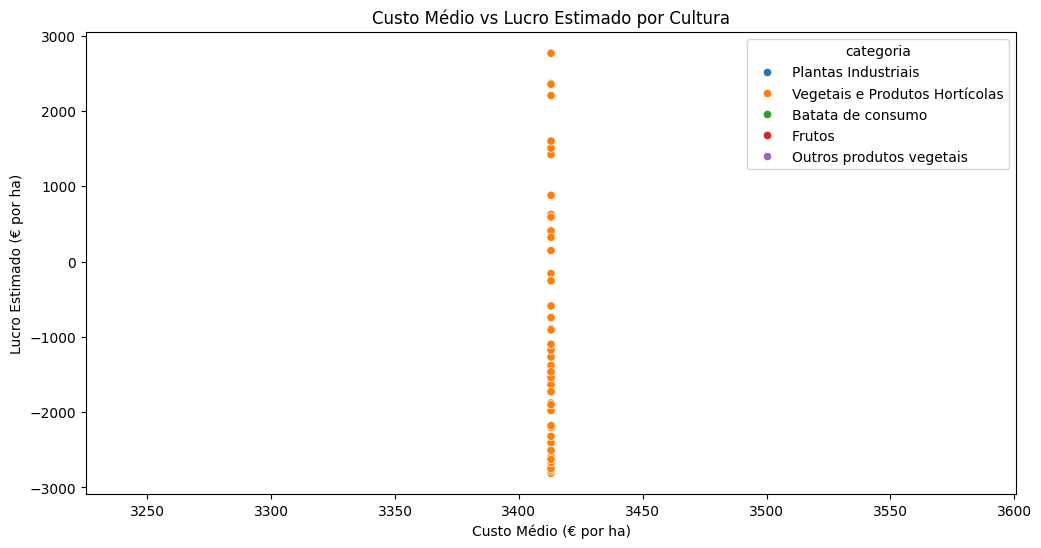

In [43]:
#chart with custo medio and lucro estimado
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_tableau, x="Custo_medio", y="Lucro_estimado", hue="categoria")
plt.title("Custo Médio vs Lucro Estimado por Cultura") 
plt.xlabel("Custo Médio (€ por ha)")
plt.ylabel("Lucro Estimado (€ por ha)")
plt.show()

In [44]:
df_tableau.to_excel(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\ironhack_final_project\Worked_datasets\dataset_tableau_costs.xlsx", index=False)